In [19]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [20]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')
#norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot__7105/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
norm_info_train = norm_info[norm_info['phase']=='train']
norm_info_val = norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [22]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_weight_var,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
num_step,,,,,,,,,,,,,,,,,,,,,
0,0.606603,-0.000019,14.525214,0.606603,0.000272,0.036603,-0.004474,226.030576,6.648546,0.027722,...,0.105540,0.055175,0.000706,0.926125,273.139736,0.000304,52.024582,0.024547,-0.022636,0.000036
1,0.675419,0.000764,15.432639,0.675419,0.000337,0.031913,-0.004482,226.030360,6.648550,0.027722,...,0.105605,0.055211,0.000706,0.867030,266.539279,-0.012183,52.123630,0.024661,-0.022514,0.000670
2,0.697223,0.000688,16.937548,0.697223,0.000363,0.027083,-0.004489,226.030554,6.648554,0.027722,...,0.105687,0.055255,0.000707,0.846313,264.255990,-0.012504,52.240504,0.024795,-0.022389,0.000820
3,0.709928,0.000712,17.694314,0.709928,0.000380,0.027310,-0.004496,226.031121,6.648559,0.027722,...,0.105778,0.055305,0.000708,0.831869,262.750900,-0.011355,52.372389,0.024943,-0.022276,0.000772
4,0.720817,0.000451,17.877003,0.720817,0.000396,0.029115,-0.004500,226.031714,6.648564,0.027722,...,0.105876,0.055356,0.000709,0.820472,261.600106,-0.010761,52.521125,0.025109,-0.022168,0.000777


In [23]:
per_inner_loop_step['all_grads_var']

num_step
0    0.926125
1    0.867030
2    0.846313
3    0.831869
4    0.820472
Name: all_grads_var, dtype: float64

In [24]:
per_inner_loop_step['all_weights_var']

num_step
0    0.024547
1    0.024661
2    0.024795
3    0.024943
4    0.025109
Name: all_weights_var, dtype: float64

In [25]:
# specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values = norm_info_train
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_gsnr,layer_dict.conv0.conv.weight_weight_mean,...,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_grads_mean,all_weights_norm,all_weights_var,all_weights_mean,gsnr
0,0,train,0,0.694372,-0.002307,20.434258,0.694372,0.000274,0.019442,-0.002287,...,0.015868,0.007617,0.000015,0.000046,2.344834,-0.000038,14.412805,0.001723,-0.000005,0.000032
1,0,train,1,0.691446,-0.002006,20.991417,0.691446,0.000273,0.014744,-0.002267,...,0.032499,0.015419,0.000059,0.000046,2.345386,-0.000022,14.412802,0.001723,-0.000005,0.000011
2,0,train,2,0.690253,-0.002156,21.076786,0.690253,0.000271,0.017132,-0.002245,...,0.049771,0.023248,0.000135,0.000045,2.340327,-0.000056,14.412815,0.001723,-0.000004,0.000070
3,0,train,3,0.683708,-0.000564,21.068472,0.683708,0.000270,0.001177,-0.002240,...,0.066361,0.030590,0.000234,0.000045,2.336979,-0.000032,14.412856,0.001723,-0.000004,0.000023
4,0,train,4,0.669606,-0.000935,20.626034,0.669606,0.000259,0.003377,-0.002230,...,0.079620,0.036846,0.000339,0.000045,2.335047,-0.000038,14.412911,0.001723,-0.000003,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796995,49999,train,0,0.238572,0.000036,5.669911,0.238572,0.000033,0.000040,-0.006088,...,0.083931,0.048724,0.000311,5.066380,781.605225,-0.004824,77.313026,0.048595,-0.031239,0.000005
796996,49999,train,1,0.511802,-0.003091,11.474688,0.511802,0.000142,0.067219,-0.006057,...,0.083931,0.048724,0.000311,4.408905,729.132202,-0.008237,77.662704,0.049050,-0.031157,0.000015
796997,49999,train,2,0.640624,-0.003093,14.959427,0.640624,0.000228,0.041938,-0.006026,...,0.083931,0.048724,0.000311,4.191300,710.917969,-0.012027,78.236595,0.049799,-0.031036,0.000035
796998,49999,train,3,0.831240,-0.001925,20.954256,0.831240,0.000396,0.009348,-0.006007,...,0.083931,0.048724,0.000311,3.914203,687.028809,-0.016767,79.338638,0.051250,-0.030869,0.000072


In [26]:
gr = specific_column_values.groupby('current_iter').mean()

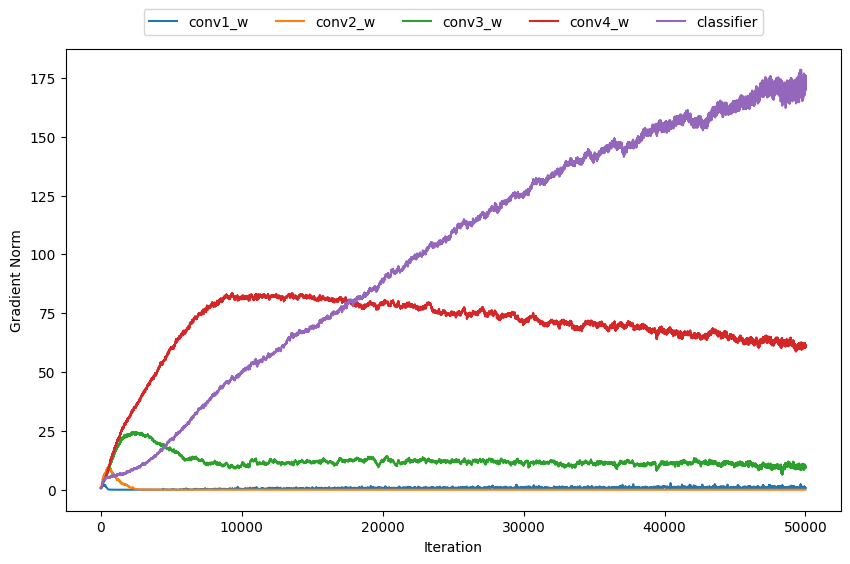

In [27]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

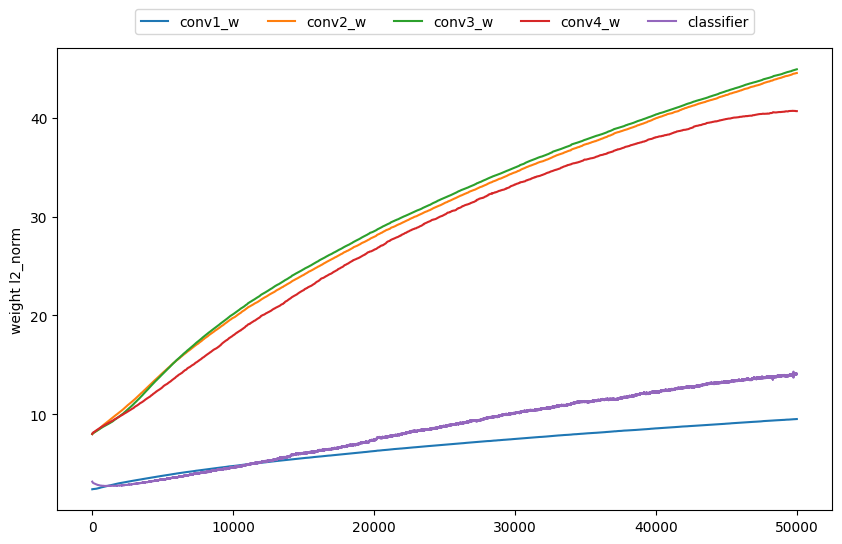

In [28]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

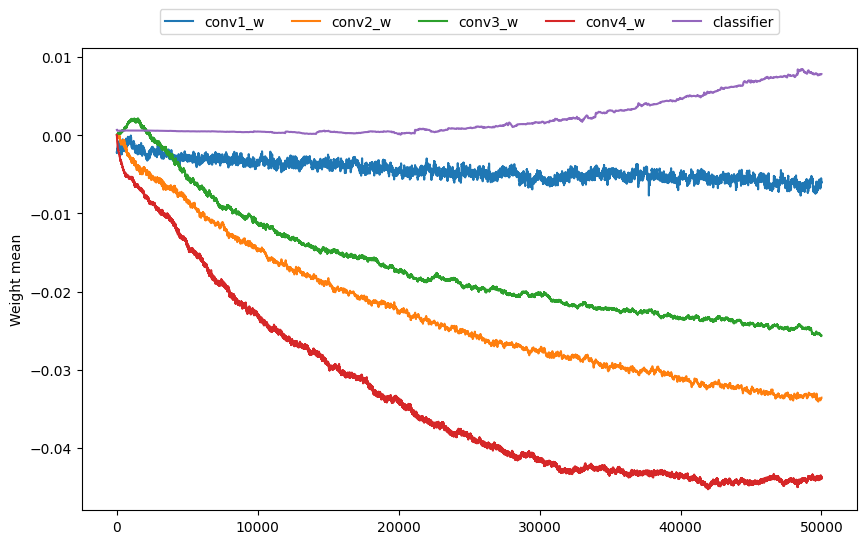

In [29]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

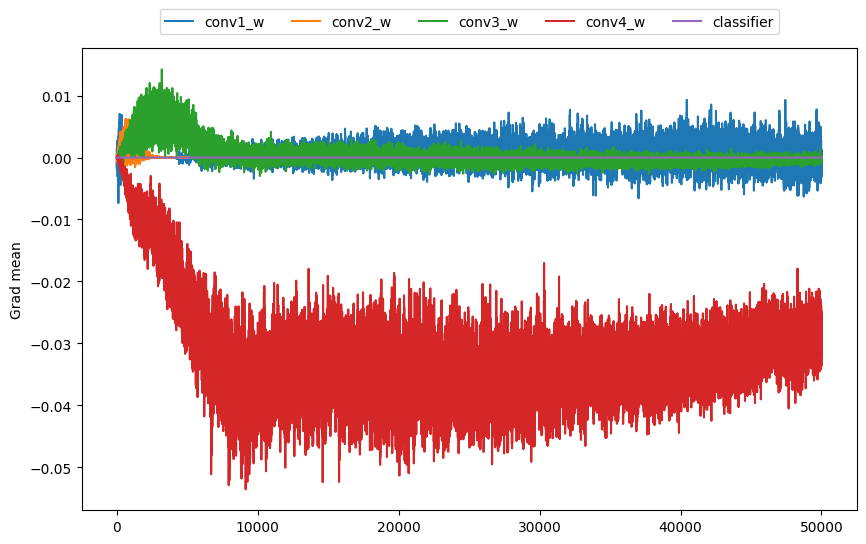

In [30]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_mean', 
                    'layer_dict.conv1.conv.weight_grad_mean', 
                    'layer_dict.conv2.conv.weight_grad_mean',
                    'layer_dict.conv3.conv.weight_grad_mean',
                    'layer_dict.linear.weights_grad_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad mean')  

# MAML의 Scale과 맞춘다
#plt.ylim([-0.006, 0.006])

plt.show()  # 그래프 보여주기

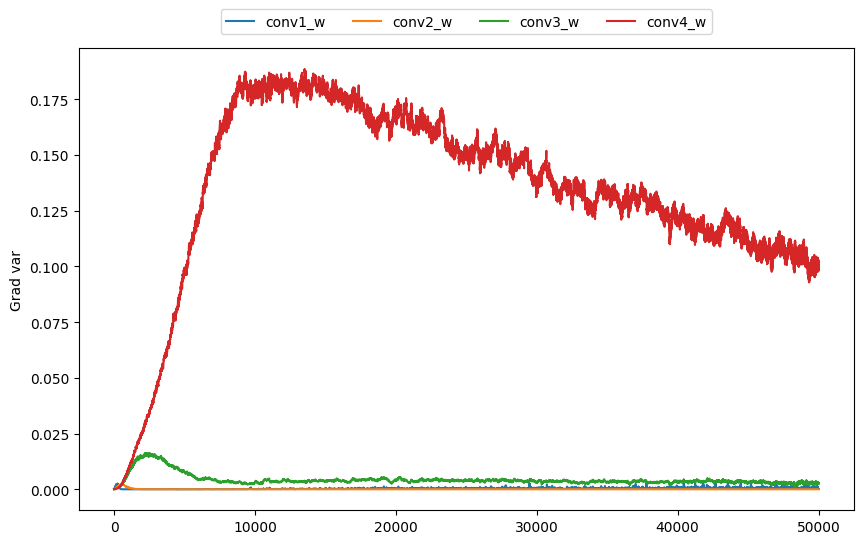

In [38]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_var', 
                    'layer_dict.conv1.conv.weight_grad_var', 
                    'layer_dict.conv2.conv.weight_grad_var',
                    'layer_dict.conv3.conv.weight_grad_var',
                    #'layer_dict.linear.weights_grad_var'
]
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         #'classifier'
]

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad var')  

# plt.ylim([0.000, 0.02])

plt.show()  # 그래프 보여주기

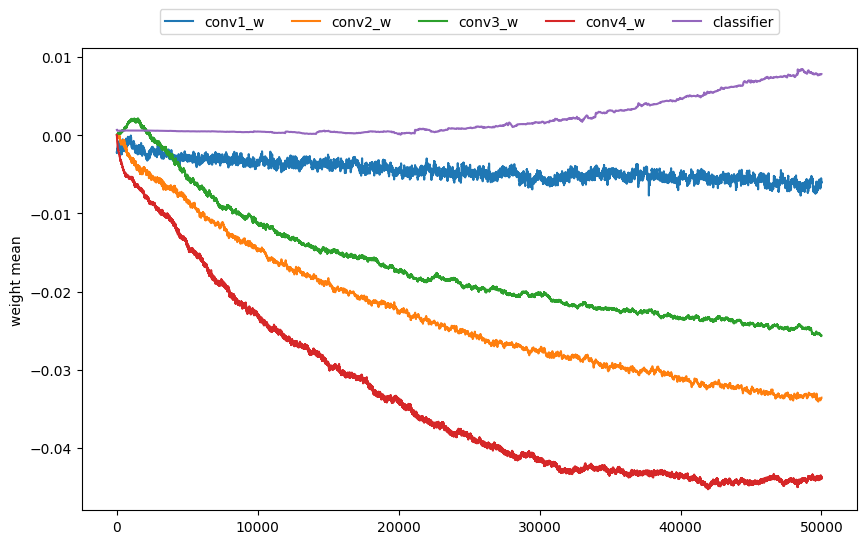

In [32]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

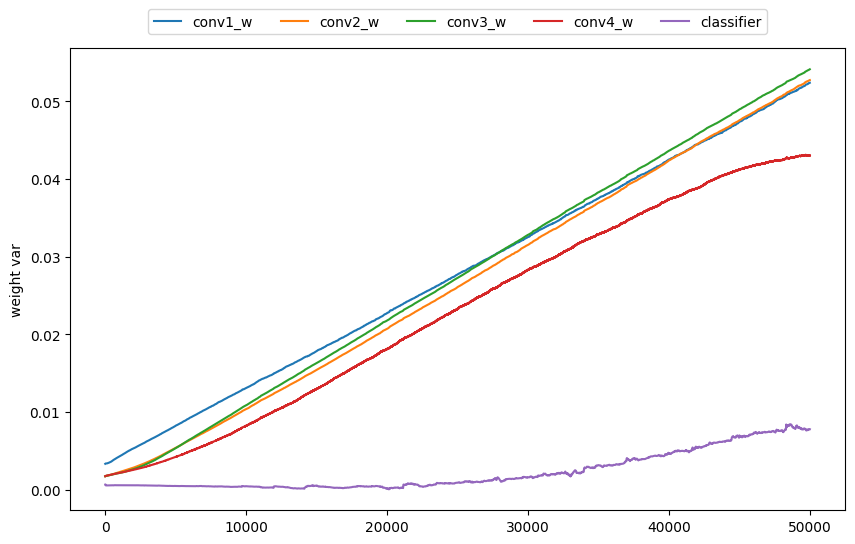

In [33]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_var', 
                    'layer_dict.conv1.conv.weight_weight_var', 
                    'layer_dict.conv2.conv.weight_weight_var',
                    'layer_dict.conv3.conv.weight_weight_var',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight var')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

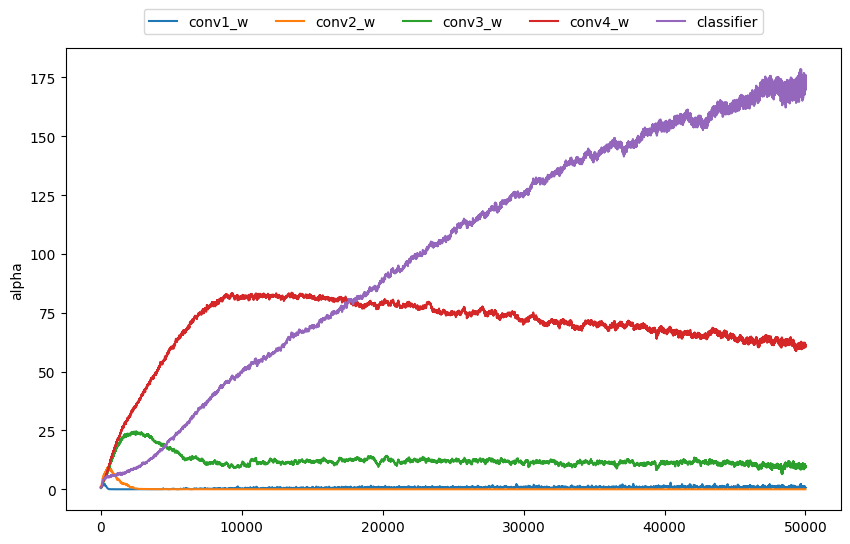

In [39]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_alpha', 
                    'layer_dict.conv1.conv.weight_alpha', 
                    'layer_dict.conv2.conv.weight_alpha',
                    'layer_dict.conv3.conv.weight_alpha',
                    'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('alpha')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

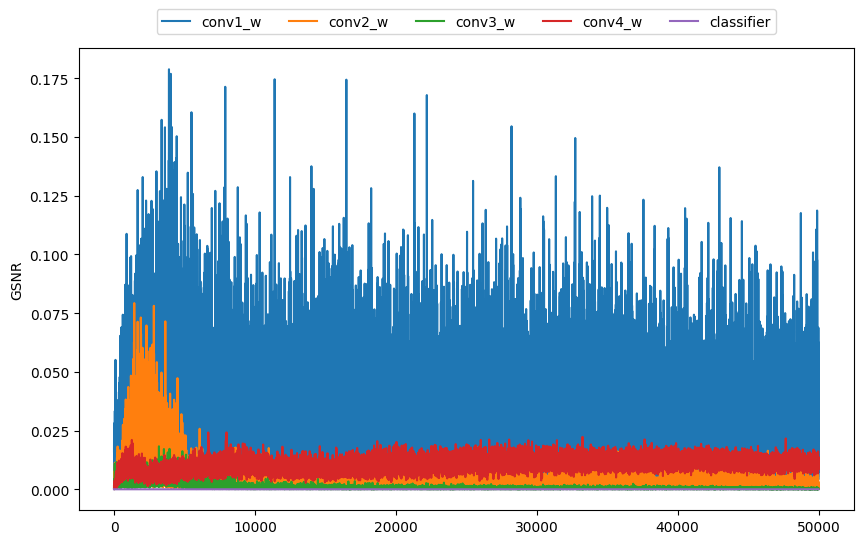

In [40]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_gsnr', 
                    'layer_dict.conv1.conv.weight_gsnr', 
                    'layer_dict.conv2.conv.weight_gsnr',
                    'layer_dict.conv3.conv.weight_gsnr',
                    'layer_dict.linear.weights_gsnr']
columns_to_plot_label = ['conv1_w', 
                         'conv2_w', 
                         'conv3_w', 
                         'conv4_w', 
                         'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('GSNR')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기